In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve, roc_auc_score
 
data = pd.read_csv('/content/Datasets_Project_Final - Final_sheet_Demo - Datasets_Project_Final - Final_sheet_Demo.csv')
 
y = data.iloc[:,-1].values
feature_names = [i for i in data.columns]
X = data.iloc[:,:-2]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=1458 , criterion='entropy',min_samples_leaf=6)
my_model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1458,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(train_X, train_y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 1)
knn.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=1,
                     weights='uniform')

In [ ]:
  data.head()

,Website_Score,Page_rank_score,Author_Score,Image_Quality_Score,Image_Score,final score,FAKE/NOTFAKE
0,7.3,3.33,6.84,1.73,9.57,5.754,1
1,8.5,2.40,6.95,3.56,9.71,6.224,0
2,8.5,0.00,6.64,6.66,9.85,6.330,0
3,9.0,0.00,7.35,7.55,3.95,5.570,1
4,8.7,2.86,6.75,4.65,6.72,5.936,1


In [ ]:
data_for_prediction = val_X.iloc[1]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

array([[0.00738462, 0.99261538]])

In [ ]:
data_for_prediction2 = val_X.iloc[0:50]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array2 = data_for_prediction2.values.reshape(50, -50)


my_model.predict_proba(data_for_prediction_array2)

array([[9.02097902e-03, 9.90979021e-01],
       [7.38461538e-03, 9.92615385e-01],
       [8.85048201e-02, 9.11495180e-01],
       [5.14567430e-01, 4.85432570e-01],
       [2.55438728e-02, 9.74456127e-01],
       [5.55100365e-02, 9.44489963e-01],
       [6.89609950e-01, 3.10390050e-01],
       [2.61208172e-01, 7.38791828e-01],
       [6.36363636e-03, 9.93636364e-01],
       [5.25000000e-03, 9.94750000e-01],
       [6.25000000e-04, 9.99375000e-01],
       [6.36363636e-03, 9.93636364e-01],
       [3.13349706e-02, 9.68665029e-01],
       [1.38896455e-01, 8.61103545e-01],
       [6.30442539e-02, 9.36955746e-01],
       [6.36363636e-03, 9.93636364e-01],
       [6.98608979e-02, 9.30139102e-01],
       [0.00000000e+00, 1.00000000e+00],
       [8.44550129e-01, 1.55449871e-01],
       [2.85714286e-03, 9.97142857e-01],
       [0.00000000e+00, 1.00000000e+00],
       [2.09007937e-02, 9.79099206e-01],
       [4.94812331e-01, 5.05187669e-01],
       [3.47523992e-01, 6.52476008e-01],
       [4.585622

In [ ]:
!pip install shap
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

     |████████████████████████████████| 358kB 13.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491614 sha256=99ee78a769a1a2d67a34b2e7ff3a3c6fa728fb6fae3f485c5a2218afd2a8a882
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


##OBSERVATION 1


###Tree explainer




In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
shap_values = explainer.shap_values(data_for_prediction2)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction2)

###Kernal Explainer


In [ ]:
shap.initjs()
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction )

Using 240 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


###Waterfall model


In [ ]:
import xgboost
from xgboost import XGBClassifier



model = xgboost.XGBClassifier()
model.fit(train_X, train_y)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

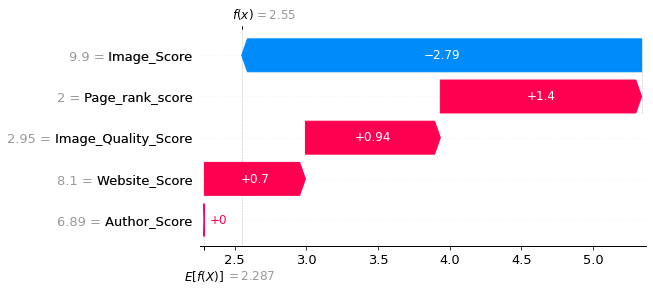

In [ ]:
explainer2 = shap.Explainer(model)
shap_values2 = explainer2(X)

shap.plots.waterfall(shap_values2[10])

In [ ]:
shap.initjs()
shap.plots.force(shap_values2[10])

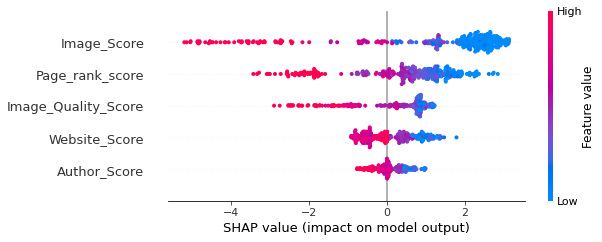

In [ ]:
shap.plots.beeswarm(shap_values2)

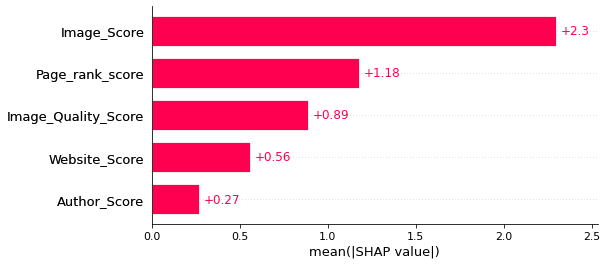

In [ ]:
shap.plots.bar(shap_values2)

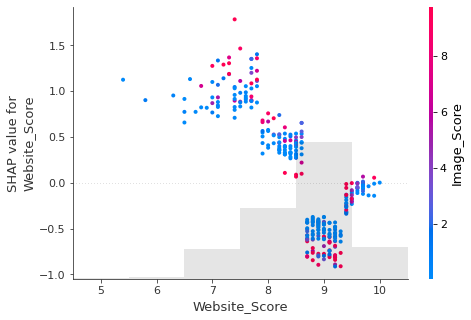

In [ ]:
shap.plots.scatter(shap_values2[:,0], color=shap_values2)

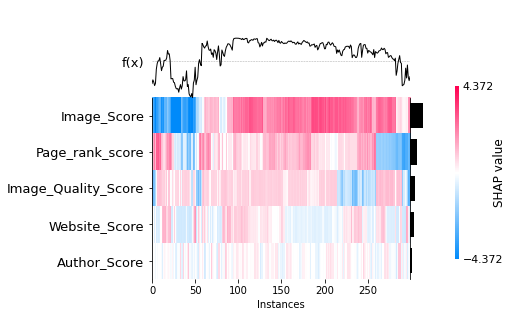

In [ ]:
shap.plots.heatmap(shap_values2[:300])

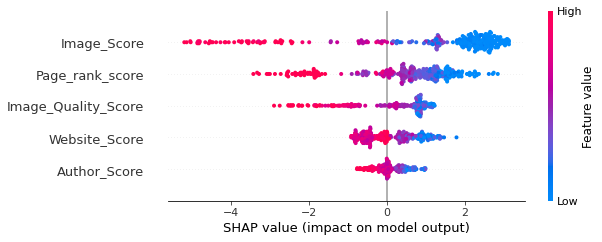

In [ ]:
shap.summary_plot(shap_values2, X)

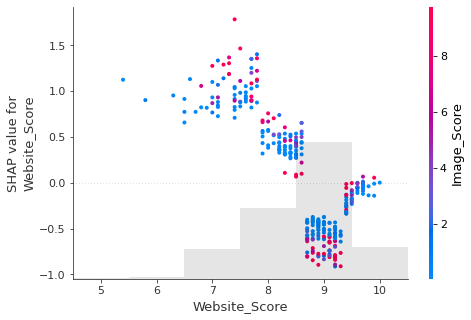

In [ ]:
shap.plots.scatter(shap_values2[:,"Website_Score"], color=shap_values2)

The expected value is  2.286666


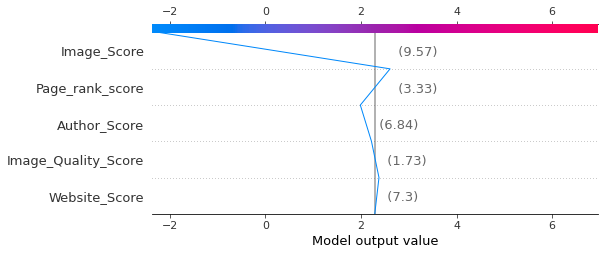

In [ ]:
expected_value = explainer2.expected_value
print("The expected value is ", expected_value)
shap_values2 = explainer2.shap_values(X)[1]
shap.decision_plot(expected_value, shap_values2, X)

The expected value is  2.286666


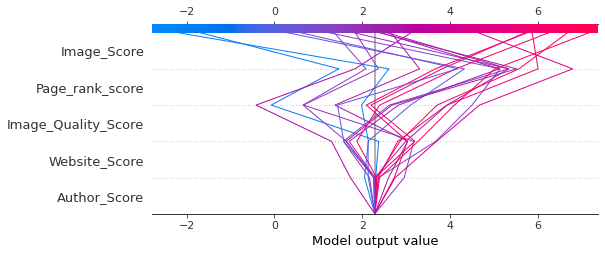

In [ ]:
expected_value = explainer2.expected_value
print("The expected value is ", expected_value)
shap_values2 = explainer2.shap_values(X)[0:20]
shap.decision_plot(expected_value, shap_values2, X)

In [ ]:
shap.decision_plot(explainer2.expected_value(), shap_values2, X)

TypeError: ignored

#Random Forest


In [ ]:
pred_rf = my_model.predict(val_X)
rf_c = confusion_matrix(val_y,pred_rf)
print(rf_c)

[[ 4  5]
 [ 0 71]]


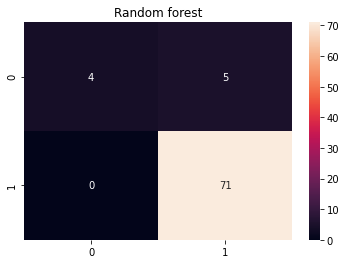

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(rf_c, annot=True, fmt='g')
plt.title(f'Random forest')
plt.show()

In [ ]:
tp_rf=rf_c[1,1]
fp_rf=rf_c[0,1]
fn_rf=rf_c[1,0]
tn_rf=rf_c[0,0]

In [ ]:
accuracy_rf = (tp_rf+tn_rf)/(tp_rf+tn_rf+fn_rf+fp_rf)
print(accuracy_rf)

0.9375


In [ ]:
# Precision for random forest 
# tp / (tp + fp)

pre_rf = (tp_rf/(tp_rf + fp_rf))
print(pre_rf)

0.9342105263157895


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_rf = (tp_rf/(tp_rf + fn_rf))
print(rec_rf)

1.0


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_rf = (2 * (pre_rf * rec_rf) / (pre_rf + rec_rf))
print(f1_rf)

0.9659863945578232


#Decision tree

In [ ]:
pred_dt = dt.predict(val_X)
dt_c = confusion_matrix(val_y,pred_dt)
print(dt_c)

[[ 5  4]
 [ 2 69]]


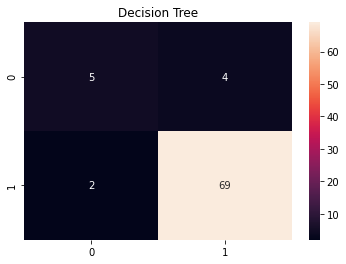

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dt_c, annot=True, fmt='g')
plt.title(f'Decision Tree')
plt.show()

In [ ]:
tp_dt=dt_c[1,1]
fp_dt=dt_c[0,1]
fn_dt=dt_c[1,0]
tn_dt=dt_c[0,0]

In [ ]:
accuracy_dt = (tp_dt+tn_dt)/(tp_dt+tn_dt+fn_dt+fp_dt)
print(accuracy_dt)

0.925


In [ ]:
# Precision for random forest 
# tp / (tp + fp)

pre_dt = (tp_dt/(tp_dt + fp_dt))
print(pre_dt)

0.9452054794520548


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_dt = (tp_dt/(tp_dt + fn_dt))
print(rec_dt)

0.971830985915493


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_dt = (2 * (pre_dt * rec_dt) / (pre_dt + rec_dt))
print(f1_dt)

0.9583333333333334



#Knn

In [ ]:
pred_knn = knn.predict(val_X)
knn_c = confusion_matrix(val_y,pred_knn)
print(knn_c)

[[ 4  5]
 [ 2 69]]


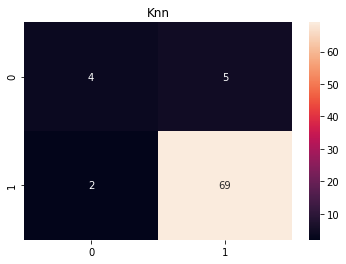

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(knn_c, annot=True, fmt='g')
plt.title(f'Knn')
plt.show()

In [ ]:
tp_knn=knn_c[1,1]
fp_knn=knn_c[0,1]
fn_knn=knn_c[1,0]
tn_knn=knn_c[0,0]

In [ ]:
accuracy_knn = (tp_knn+tn_knn)/(tp_knn+tn_knn+fn_knn+fp_knn)
print(accuracy_knn)

0.9125


In [ ]:
# Precision for random forest 
# tp / (tp + fp)

pre_knn = (tp_knn/(tp_knn + fp_knn))
print(pre_knn)

0.9324324324324325


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_knn = (tp_knn/(tp_knn + fn_knn))
print(rec_knn)

0.971830985915493


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_knn = (2 * (pre_knn * rec_knn) / (pre_knn + rec_knn))
print(f1_knn)

0.9517241379310345



#Xgboost

In [ ]:
pred_xg = model.predict(val_X)
xg_c = confusion_matrix(val_y,pred_xg)
print(xg_c)

[[ 7  2]
 [ 0 71]]


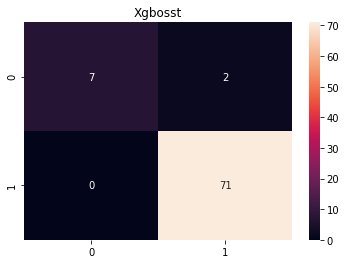

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(xg_c, annot=True, fmt='g')
plt.title(f'Xgbosst')
plt.show()

In [ ]:
tp_xg=xg_c[1,1]
fp_xg=xg_c[0,1]
fn_xg=xg_c[1,0]
tn_xg=xg_c[0,0]

In [ ]:
accuracy_xg = (tp_xg+tn_xg)/(tp_xg+tn_xg+fn_xg+fp_xg)
print(accuracy_xg)

0.975


In [ ]:
# Precision for random forest 
# tp / (tp + fp)

pre_xg = (tp_xg/(tp_xg + fp_xg))
print(pre_xg)

0.9726027397260274


In [ ]:
# Recall for random forest
# tp / (tp + fn)

rec_xg = (tp_xg/(tp_xg + fn_xg))
print(rec_xg)

1.0


In [ ]:
#random forest
# F1  = 2 * (precision * recall) / (precision + recall)

f1_xg = (2 * (pre_xg * rec_xg) / (pre_xg + rec_xg))
print(f1_xg)

0.9861111111111112


#EDA


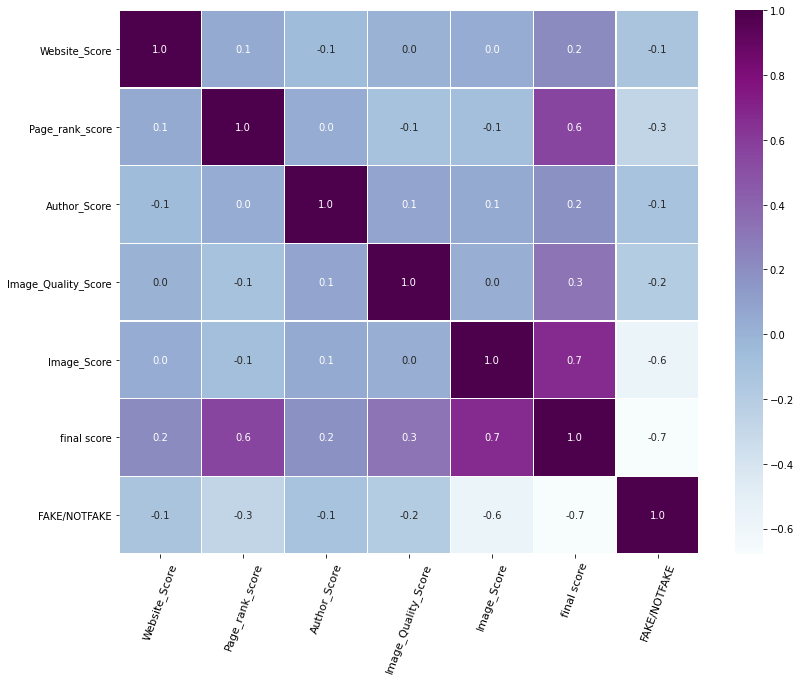

In [ ]:
f,ax = plt.subplots(figsize=(13,10))
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(data.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="BuPu")
plt.xticks(fontsize=11,rotation=70)
plt.show()

In [ ]:
data = data.rename(columns = {'FAKE/NOTFAKE': 'Fake_not_fake'}, inplace = False)

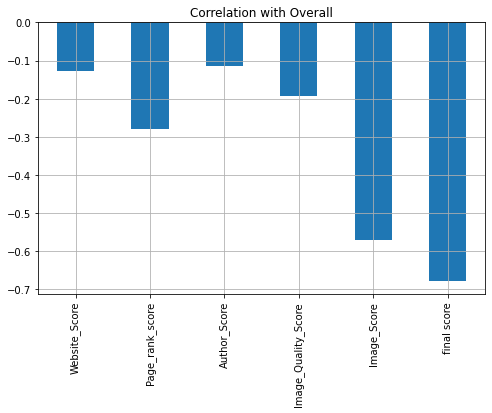

In [ ]:
data.drop('Fake_not_fake', axis=1).corrwith(data.Fake_not_fake).plot(kind = 'bar', grid = True, 
                                                   figsize = (8, 5), 
                                                   title = "Correlation with Overall")

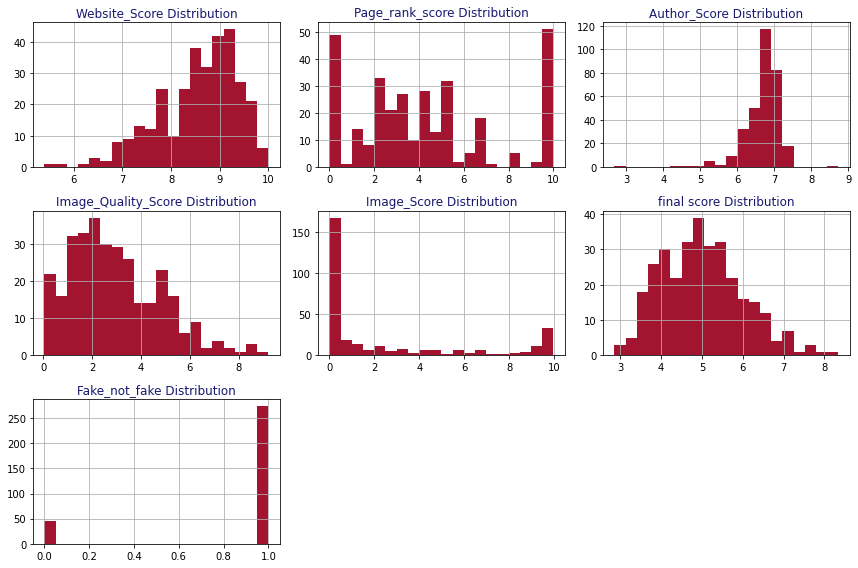

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(12,8))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='#A2142F')
        ax.set_title(feature+" Distribution",color='midnightblue')
        
    fig.tight_layout()
    plt.show()
draw_histograms(data,data.columns,3,3)

In [ ]:
classifiers = [my_model,dt,knn,model]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    models = cls.fit(train_X, train_y)
    yproba = models.predict_proba(val_X)[::,1]
    
    fpr, tpr, _ = roc_curve(val_y,  yproba)
    auc = roc_auc_score(val_y, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

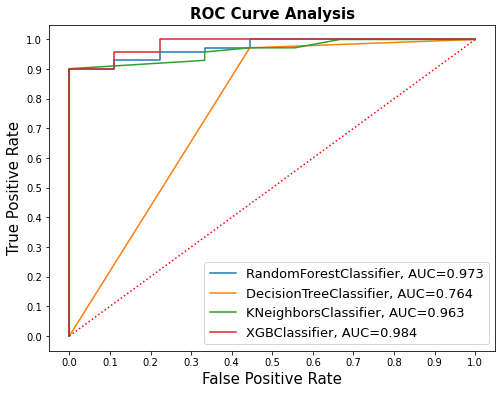

In [ ]:



import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))  
plt.plot([0,1], [0,1], color='red', linestyle=':')

plt.xticks(np.arange(0.0, 1.1, step=0.1)) 
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:

result_table.reset_index(drop=True, inplace=True)
auc_values = result_table.iloc[:,-1].to_frame()
auc_values

,auc
0,0.973396
1,0.763693
2,0.963224
3,0.984351


In [ ]:
list1=[['Random Forest',accuracy_rf,pre_rf,rec_rf,f1_rf],['Decision Tree',accuracy_dt,pre_dt,rec_dt,f1_dt],['KNN',accuracy_knn ,pre_knn,rec_knn,f1_knn],['Xgboost',accuracy_xg, pre_xg,rec_xg,f1_xg]]
Comparision = pd.DataFrame(list1)
Comparision.columns = ['Classification Modal','Accuracy','Precision','Recall','F1-score']
Comparision 

,Classification Modal,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.9375,0.934211,1.000000,0.965986
1,Decision Tree,0.9250,0.945205,0.971831,0.958333
2,KNN,0.9125,0.932432,0.971831,0.951724
3,Xgboost,0.9750,0.972603,1.000000,0.986111


In [ ]:
frames = [Comparision,auc_values]
result = pd.concat(frames,axis=1)
result

,Classification Modal,Accuracy,Precision,Recall,F1-score,auc
0,Random Forest,0.9375,0.934211,1.000000,0.965986,0.973396
1,Decision Tree,0.9250,0.945205,0.971831,0.958333,0.763693
2,KNN,0.9125,0.932432,0.971831,0.951724,0.963224
3,Xgboost,0.9750,0.972603,1.000000,0.986111,0.984351


In [ ]:
result.to_csv("result.csv")